In [1]:
import numpy as np
from pandas import Series
import seaborn as sns
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
#make the last 

files = glob.glob('../Dissertation_projects/Data/CNS/FINAL_DATA/*.xlsx')

for f in files: 
    read_file = pd.read_excel (f, sheet_name='Sheet1')
    name = f[:-5]
    read_file.to_csv (name + ".csv", index = None, header=True)
    
#make the new files list the csv files much safer
files = glob.glob('../Dissertation_projects/Data/CNS/FINAL_DATA/*.csv')
files

['../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.11_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.11_SUMMER2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.14_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.14_SPRING2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.14_SUMMER2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.2_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.2_SPRING2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.2_SUMMER2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.5B_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.5B_SPRING2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.5B_SUMMER2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.7_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.7_SPRING2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.7_SUMMER2022.csv',
 '../Dissertation_proj

In [3]:
#make function 
def GET_DATA(name):
    df = pd.read_csv(name, sep=',', index_col=0)
    df = pd.DataFrame(df)
    return df

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function  
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=0, ignore_index=False)

df

,Station,Trip,Porosity,Depth_CM,Width,OC_tube,OC_Tube_Full,OC_Tube_Post_HCL,OC_FULL,OC_POST_HCL,...,TN%,TC%,TS%,ON%_mesured,OC%_mesured,OS%_mesured,ON%,IN%,OC%,IC%
ID,,,,,,,,,,,,,,,,,,,,,
1,St.11,GOM21FA,0.926658,0.25,0.50,3.0629,3.1370,3.1598,0.0741,0.0969,...,0.188199,1.934575,0.030193,0.135034,0.868314,0.159005,0.176583,0.011616,1.135488,0.799087
2,St.11,GOM21FA,0.905162,0.75,0.50,3.0975,3.1984,3.2188,0.1009,0.1213,...,0.190637,1.882505,0.073269,0.145712,0.928393,0.222654,0.175172,0.015464,1.116096,0.766409
3,St.11,GOM21FA,0.905085,1.25,0.50,3.0679,3.1148,3.1236,0.0469,0.0557,...,0.195553,1.873997,0.041674,0.138553,0.900826,0.141942,0.164550,0.031003,1.069850,0.804147
4,St.11,GOM21FA,0.894661,1.75,0.50,3.0666,3.1281,3.1385,0.0615,0.0719,...,0.168884,1.758187,0.062916,0.132988,0.902882,0.176013,0.155477,0.013408,1.055565,0.702622
5,St.11,GOM21FA,0.890890,2.25,0.50,3.1050,3.1467,3.1538,0.0417,0.0488,...,0.178660,1.693657,0.078806,0.136315,0.891006,0.163414,0.159525,0.019136,1.042712,0.650946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,St.9,GOM22SU,0.780161,17.00,4.75,3.1018,3.1677,3.1713,0.0659,0.0695,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
19,St.9,GOM22SU,0.758741,22.50,5.25,3.0784,3.1378,3.1412,0.0594,0.0628,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
20,St.9,GOM22SU,0.731244,27.50,5.00,3.0744,3.1413,3.1456,0.0669,0.0712,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000


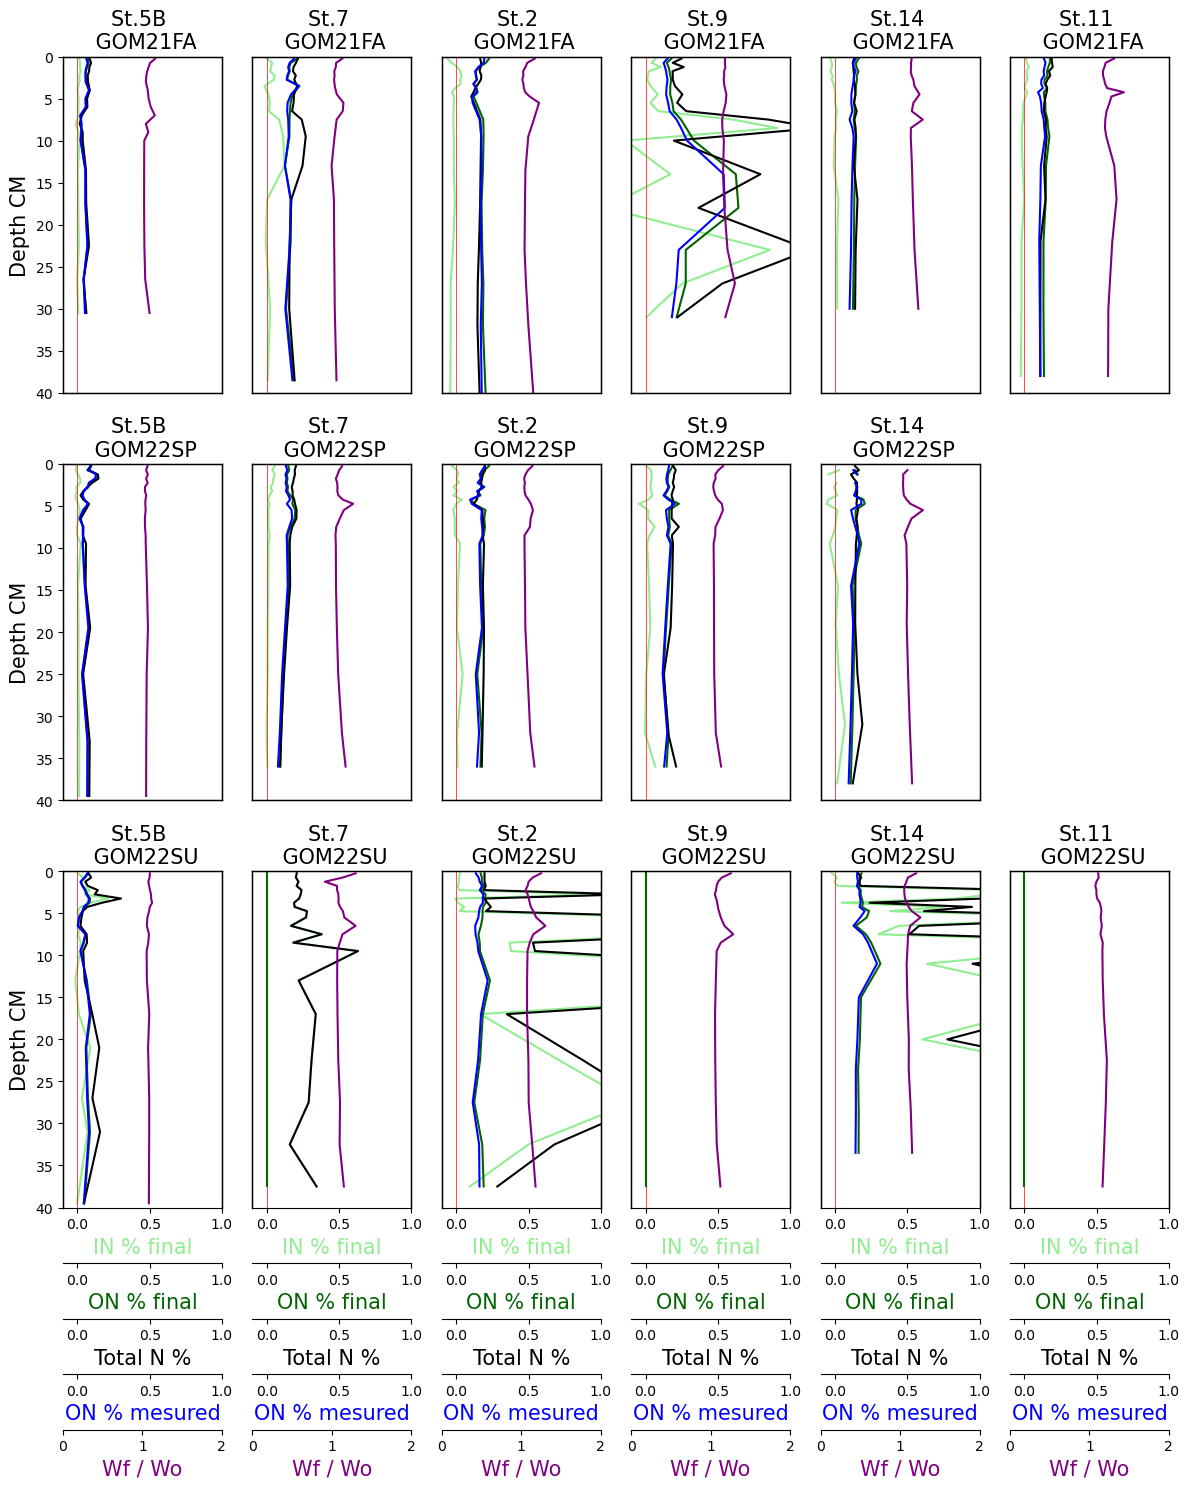

In [4]:
stations = ['St.5B','St.7','St.2','St.9','St.14','St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']


fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:
            
            ax = axes[i, j]
            
            ax.plot(sub_df['IN%'], sub_df['Depth_CM'], c = 'lightgreen')
            ax.set_title(f'{station} \n {trip}', size =15)
            ax.set_ylim(40,0)
            ax.set_xlim(-.1,1)
            ax.axvline(linewidth=.5, color='r')
            
            ax2 = ax.twiny()
            ax2.plot(sub_df['ON%'], sub_df['Depth_CM'], c = 'darkgreen')
            ax2.set_ylim(40,0)
            ax2.set_xlim(-.1,1)
            
            ax3 = ax.twiny()
            ax3.plot(sub_df['TN%'], sub_df['Depth_CM'], c = 'black')
            ax3.set_ylim(40,0)
            ax3.set_xlim(-.1,1)
            
            ax4 = ax.twiny()
            ax4.plot(sub_df['ON%_mesured'], sub_df['Depth_CM'], c = 'blue')
            ax4.set_ylim(40,0)
            ax4.set_xlim(-.1,1)
            
            ax5 = ax.twiny()
            ax5.plot(sub_df['Wf/Wo'], sub_df['Depth_CM'], c = 'purple')
            ax5.set_ylim(40,0)
            ax5.set_xlim(0,2)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('IN % final', size=15, c='lightgreen')
            ax.xaxis.set_tick_params(labelsize=10)
            
            ax2.set_xlabel('ON % final', size = 15, c= 'darkgreen')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
            
            ax3.set_xlabel('Total N %', size = 15, c= 'black')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 80))
            
            ax4.set_xlabel('ON % mesured', size = 15, c= 'blue')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 120))
            
            ax5.set_xlabel('Wf / Wo', size = 15, c= 'purple')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 160))
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            
            ax5.set_xlabel('')
            ax5.xaxis.set_ticklabels([])
            ax5.set_xticks([])
        

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

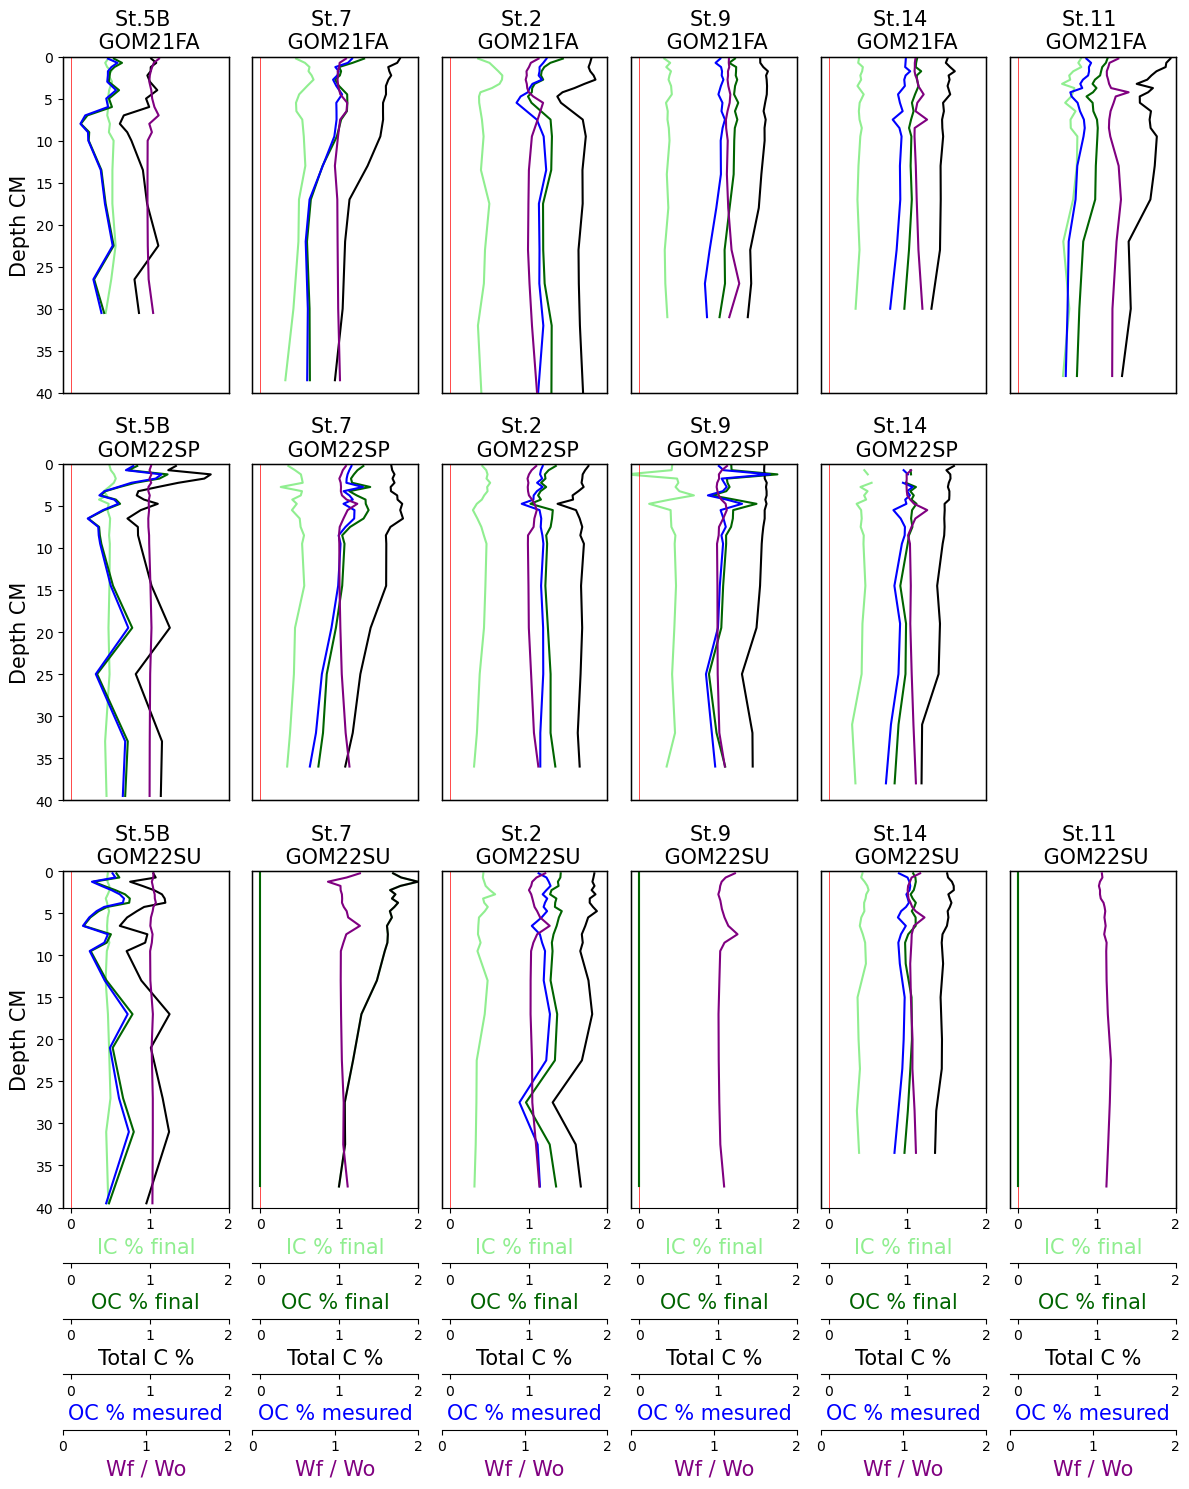

In [5]:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:
            
            ax = axes[i, j]
            
            ax.plot(sub_df['IC%'], sub_df['Depth_CM'], c = 'lightgreen')
            ax.set_title(f'{station} \n {trip}', size =15)
            ax.set_ylim(40,0)
            ax.set_xlim(-.1,2)
            ax.axvline(linewidth=.5, color='r')
            
            ax2 = ax.twiny()
            ax2.plot(sub_df['OC%'], sub_df['Depth_CM'], c = 'darkgreen')
            ax2.set_ylim(40,0)
            ax2.set_xlim(-.1,2)
            
            ax3 = ax.twiny()
            ax3.plot(sub_df['TC%'], sub_df['Depth_CM'], c = 'black')
            ax3.set_ylim(40,0)
            ax3.set_xlim(-.1,2)
            
            ax4 = ax.twiny()
            ax4.plot(sub_df['OC%_mesured'], sub_df['Depth_CM'], c = 'blue')
            ax4.set_ylim(40,0)
            ax4.set_xlim(-.1,2)
            
            ax5 = ax.twiny()
            ax5.plot(sub_df['Wf/Wo'], sub_df['Depth_CM'], c = 'purple')
            ax5.set_ylim(40,0)
            ax5.set_xlim(0,2)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('IC % final', size=15, c='lightgreen')
            ax.xaxis.set_tick_params(labelsize=10)
            
            ax2.set_xlabel('OC % final', size = 15, c= 'darkgreen')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
            
            ax3.set_xlabel('Total C %', size = 15, c= 'black')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 80))
            
            ax4.set_xlabel('OC % mesured', size = 15, c= 'blue')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 120))
            
            ax5.set_xlabel('Wf / Wo', size = 15, c= 'purple')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 160))
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            
            ax5.set_xlabel('')
            ax5.xaxis.set_ticklabels([])
            ax5.set_xticks([])
        

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

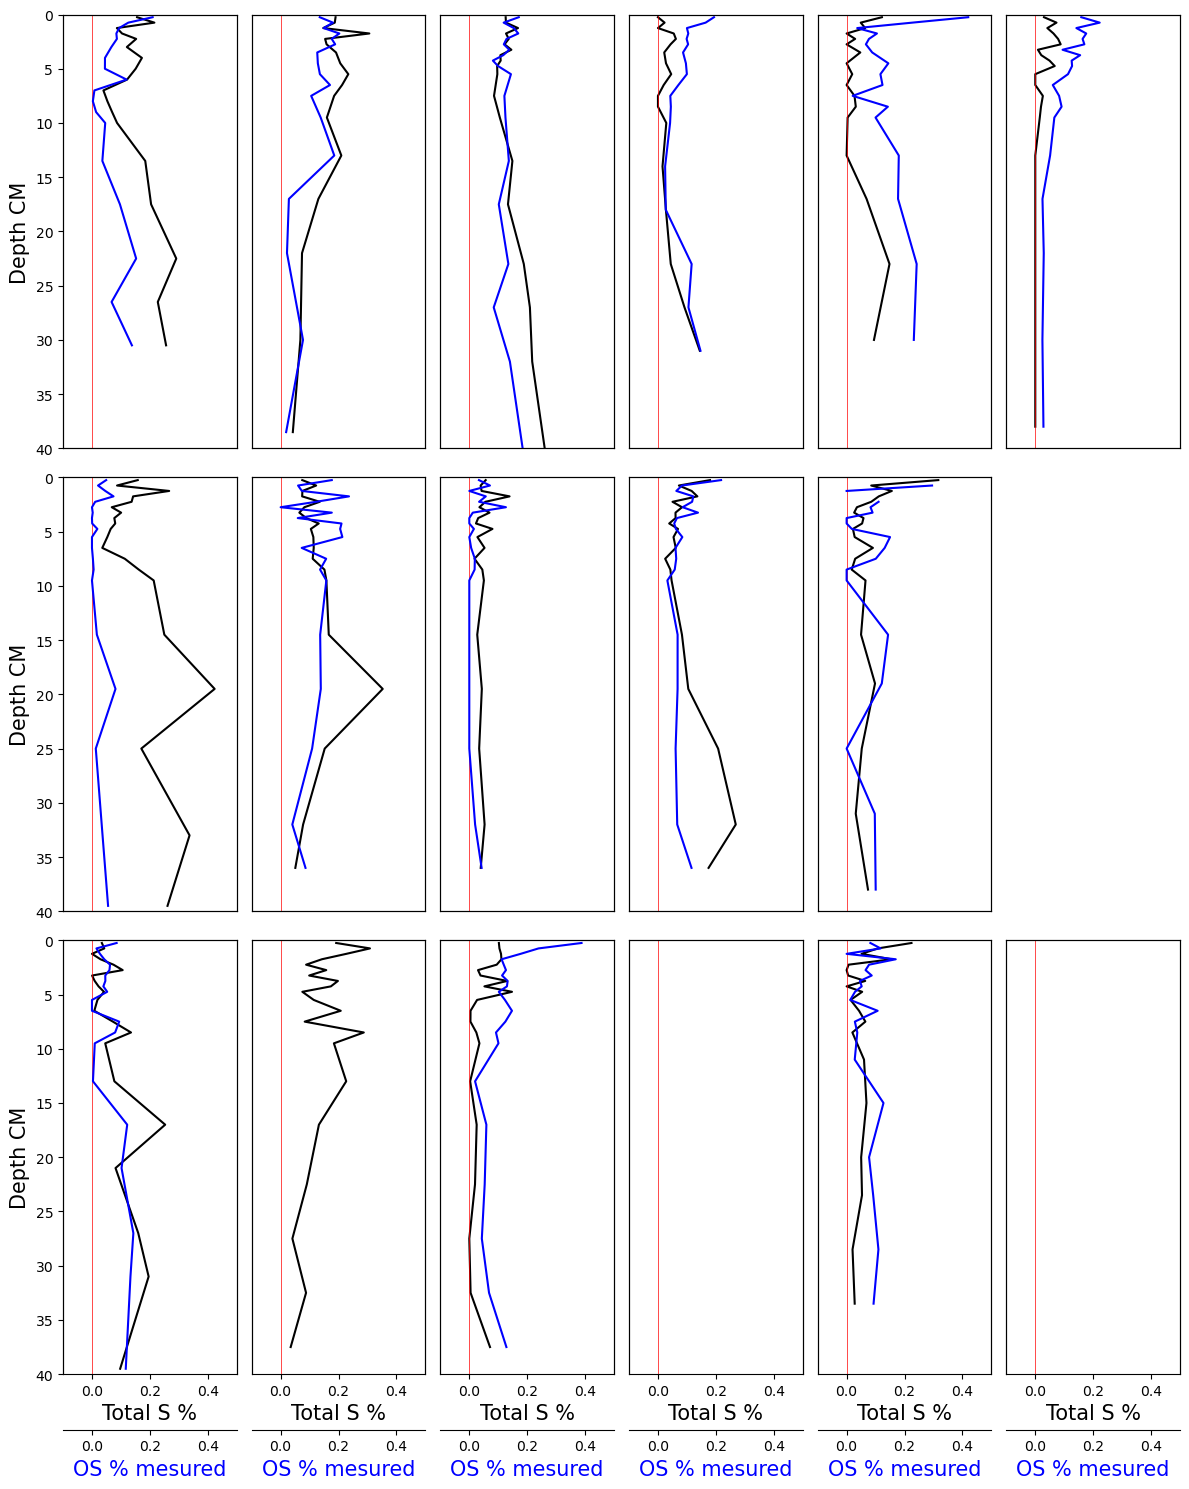

In [6]:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:
            
            ax = axes[i, j]
            
            ax.plot(sub_df['TS%'], sub_df['Depth_CM'], c = 'black')
            ax.set_ylim(40,0)
            ax.set_xlim(-.1,.5)
            ax.axvline(linewidth=.5, color='r')

            
            ax4 = ax.twiny()
            ax4.plot(sub_df['OS%_mesured'], sub_df['Depth_CM'], c = 'blue')
            ax4.set_ylim(40,0)
            ax4.set_xlim(-.1,.5)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('Total S %', size=15, c='black')
            ax.xaxis.set_tick_params(labelsize=10)
            
            ax4.set_xlabel('OS % mesured', size = 15, c= 'blue')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 40))
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

In [7]:
df['C_g/cm3'] = df['TC%'] * (1-df['Porosity']) * 2.65
df['N_g/cm3'] = df['TN%'] * (1-df['Porosity']) * 2.65
df['S_g/cm3'] = df['TS%'] * (1-df['Porosity']) * 2.65

df['IC_g/cm3'] = df['IC%'] * (1-df['Porosity']) * 2.65
df['OC_g/cm3'] = df['OC%'] * (1-df['Porosity']) * 2.65

df['C_g'] = df['TC%'] * (1-df['Porosity']) * 2.65 * df['Width']
df['N_g'] = df['TN%'] * (1-df['Porosity']) * 2.65 * df['Width']
df['S_g'] = df['TS%'] * (1-df['Porosity']) * 2.65 * df['Width']

df['OC_g'] = df['OC%'] * (1-df['Porosity']) * 2.65 * df['Width']
df['IC_g'] = df['IC%'] * (1-df['Porosity']) * 2.65 * df['Width']



Frames = []

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub.empty:
            
            C_5 = sub.loc[(sub['Depth_CM'] < 5) & (sub['Depth_CM'] > 0), 'C_g'].ravel().sum()*10000
            C_15 = sub.loc[(sub['Depth_CM'] < 15) & (sub['Depth_CM'] > 0), 'C_g'].ravel().sum()*10000
            C_30 = sub.loc[(sub['Depth_CM'] < 30) & (sub['Depth_CM'] > 0), 'C_g'].ravel().sum()*10000
            
            OC_5 = sub.loc[(sub['Depth_CM'] < 5) & (sub['Depth_CM'] > 0), 'OC_g'].ravel().sum()*10000
            OC_15 = sub.loc[(sub['Depth_CM'] < 15) & (sub['Depth_CM'] > 0), 'OC_g'].ravel().sum()*10000
            OC_30 = sub.loc[(sub['Depth_CM'] < 30) & (sub['Depth_CM'] > 0), 'OC_g'].ravel().sum()*10000
            
            IC_5 = sub.loc[(sub['Depth_CM'] < 5) & (sub['Depth_CM'] > 0), 'IC_g'].ravel().sum()*10000
            IC_15 = sub.loc[(sub['Depth_CM'] < 15) & (sub['Depth_CM'] > 0), 'IC_g'].ravel().sum()*10000
            IC_30 = sub.loc[(sub['Depth_CM'] < 30) & (sub['Depth_CM'] > 0), 'IC_g'].ravel().sum()*10000
            
            N_5 = sub.loc[(sub['Depth_CM'] < 5) & (sub['Depth_CM'] > 0), 'N_g'].ravel().sum()*10000
            N_15 = sub.loc[(sub['Depth_CM'] < 15) & (sub['Depth_CM'] > 0), 'N_g'].ravel().sum()*10000
            N_30 = sub.loc[(sub['Depth_CM'] < 30) & (sub['Depth_CM'] > 0), 'N_g'].ravel().sum()*10000
            
            S_5 = sub.loc[(sub['Depth_CM'] < 5) & (sub['Depth_CM'] > 0), 'S_g'].ravel().sum()*10000
            S_15 = sub.loc[(sub['Depth_CM'] < 15) & (sub['Depth_CM'] > 0), 'S_g'].ravel().sum()*10000
            S_30 = sub.loc[(sub['Depth_CM'] < 30) & (sub['Depth_CM'] > 0), 'S_g'].ravel().sum()*10000
            
            code = station + '_' + trip
            
            dic = {'code':[code],
                   'Camp':[trip],
                   'Stn':[station], 
                   'Cg_5cm_deep/M2':[C_5], 
                   'Cg_15cm_deep/M2':[C_15], 
                   'Cg_30cm_deep/M2':[C_30],
                   'OCg_5cm_deep/M2':[OC_5], 
                   'OCg_15cm_deep/M2':[OC_15], 
                   'OCg_30cm_deep/M2':[OC_30],
                   'ICg_5cm_deep/M2':[IC_5], 
                   'ICg_15cm_deep/M2':[IC_15], 
                   'ICg_30cm_deep/M2':[IC_30],
                   'Ng_5cm_deep/M2':[N_5], 
                   'Ng_15cm_deep/M2':[N_15], 
                   'Ng_30cm_deep/M2':[N_30],
                   'Sg_5cm_deep/M2':[S_5], 
                   'Sg_15cm_deep/M2':[S_15], 
                   'Sg_30cm_deep/M2':[S_30],}
            
            stocks = pd.DataFrame(dic)
            stocks = stocks.set_index('code', drop=True)
            Frames.append(stocks)
            
NCS_stocks = pd.concat(Frames, axis=0, ignore_index=False)

NCS_stocks.to_csv('../Dissertation_projects/Data/Stats_data_sets/NCS_stocks.csv')

NCS_stocks

,Camp,Stn,Cg_5cm_deep/M2,Cg_15cm_deep/M2,Cg_30cm_deep/M2,OCg_5cm_deep/M2,OCg_15cm_deep/M2,OCg_30cm_deep/M2,ICg_5cm_deep/M2,ICg_15cm_deep/M2,ICg_30cm_deep/M2,Ng_5cm_deep/M2,Ng_15cm_deep/M2,Ng_30cm_deep/M2,Sg_5cm_deep/M2,Sg_15cm_deep/M2,Sg_30cm_deep/M2
code,,,,,,,,,,,,,,,,,
St.5B_GOM21FA,GOM21FA,St.5B,33344.913337,137838.971177,282080.399574,17594.940556,56578.567034,120617.690154,15749.972780,81260.404142,161462.709420,2594.618883,8349.483051,17486.678467,4655.807400,19316.421746,55488.543760
St.7_GOM21FA,GOM21FA,St.7,32051.412348,111373.907754,198561.283411,20731.404213,70993.415210,119543.116470,11320.008135,40380.492544,79018.166941,3830.695251,16760.853482,29633.075330,3803.647270,14312.646362,21912.161499
St.2_GOM21FA,GOM21FA,St.2,38847.628615,124524.055679,248711.507385,26796.911262,91539.150169,181125.741725,12050.717353,32984.905510,67585.765661,3450.323952,11825.049649,23602.265862,2881.067567,8989.504856,22393.150879
St.9_GOM21FA,GOM21FA,St.9,37362.058178,149064.739062,292192.427542,28293.942630,114241.446848,223523.888705,9068.115547,34823.292214,68668.538837,5039.547106,48383.220217,115332.971635,700.463063,1994.634353,7274.216959
St.14_GOM21FA,GOM21FA,St.14,37459.890399,126353.607548,232275.969948,27453.165034,92099.314416,169482.924314,10006.725364,34254.293132,62793.045634,3249.565709,11676.633198,22715.554244,742.966686,1272.256233,9857.329290
St.11_GOM21FA,GOM21FA,St.11,25520.884300,106173.020086,196675.526292,15054.601601,61707.209263,114826.657624,10466.282699,44465.810823,81848.868668,2487.272177,9179.309410,16646.409065,794.459737,1159.934641,1159.934641
St.5B_GOM22SP,GOM22SP,St.5B,37972.627341,170391.260251,303536.382579,22010.106298,83822.063648,151241.754899,15962.521043,86569.196603,152294.627680,2259.293389,9537.032115,17300.435767,3480.004194,30827.749633,66638.868492
St.7_GOM22SP,GOM22SP,St.7,28052.090511,116658.779339,204925.239251,20548.902857,80173.492401,139660.045465,7503.187654,36485.286938,65265.193786,3069.906542,12183.113941,20687.286483,1582.819045,9805.519583,25799.617302
St.2_GOM22SP,GOM22SP,St.2,33625.473529,119664.675860,208697.439726,24433.724073,88249.333438,155691.068471,9191.749456,31415.342422,53006.371255,3360.356373,12939.450779,23098.535255,1214.751385,3074.966564,5113.521304
